---
Mengimport Beberapa Libraries Yang Dibutuhkan Dan Membuat Function Untuk Mendownload Data Dari Path Yang Ditentukan

In [93]:
import urllib.request
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv"

def download_url_path(path:str) -> pd.DataFrame:
    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)

    return data

# Informasi tentang fitur-fitur

### 1. garis bujur (longitude): Ukuran sejauh mana rumah berada di barat; nilai yang lebih tinggi berarti lebih jauh ke barat
### 2. garis lintang (latitude): Ukuran sejauh mana rumah berada di utara; nilai yang lebih tinggi berarti lebih jauh ke utara
### 3. usia_median_perumahan (housing_median_age): Usia median sebuah rumah dalam satu blok; angka yang lebih rendah berarti bangunan yang lebih baru
### 4. total_kamar (total_rooms): Jumlah total kamar dalam satu blok
### 5. total_kamar_tidur (total_bedrooms): Jumlah total kamar tidur dalam satu blok
### 6. populasi (population): Jumlah total orang yang tinggal dalam satu blok
### 7. rumah_tangga (households): Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah, untuk satu blok
### 8. pendapatan_median (median_income): Pendapatan median untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS)
### 9. nilai_rumah_median (median_house_value): Nilai median rumah untuk rumah tangga dalam satu blok (diukur dalam Dolar AS)
### 10. kedekatan_laut (ocean_proximity): Lokasi rumah terkait dengan laut/lautan

---
Menyimpan Data Ke Variabel

In [94]:
df = download_url_path(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


---
Membuat Function Untuk Menampilkan Data Yang Sama, Data Yang Kosong, Info Data, Dan Deskripsi Data

In [95]:
def checking_all(df:pd.DataFrame) -> None:
    print("\n"+"--- Total Duplicated ---"+"\n")
    print(df.duplicated().sum())
    print("\n"+"--- Total Null ---"+"\n")
    print(df.isnull().sum())
    print("\n"+"--- Info Data ---"+"\n")
    print(df.info())
    print("\n"+"--- Describe Data ---"+"\n")
    print(df.describe())

---
Menampilkan Data Dengan Function 'checking_all'

In [96]:
checking_all(df)


--- Total Duplicated ---

0

--- Total Null ---

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

--- Info Data ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocea

---
Membuat Function Untuk Mempreprocessing Data Frame

In [97]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def preprocessing_df(df:pd.DataFrame) -> pd.DataFrame:
    model_orr = OrdinalEncoder()
    model_iter = IterativeImputer()

    column_not_number = df.select_dtypes(["object"]).columns
    df[column_not_number] = model_orr.fit_transform(df[column_not_number])

    checking_null = df.isnull().sum()
    column_that_has_null = list(checking_null[checking_null > 1].index)
    df[column_that_has_null] = model_iter.fit_transform(df[column_that_has_null])

    return df

---
Menggunakan Function 'preprocessing_df'

In [98]:
df_1 = preprocessing_df(df)

---
Menggunakan Function 'checking_all'

In [99]:
checking_all(df_1)


--- Total Duplicated ---

0

--- Total Null ---

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

--- Info Data ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     2064

---
Menampilkan Hubungan Antar Column Dengan Yang Lain

<Axes: >

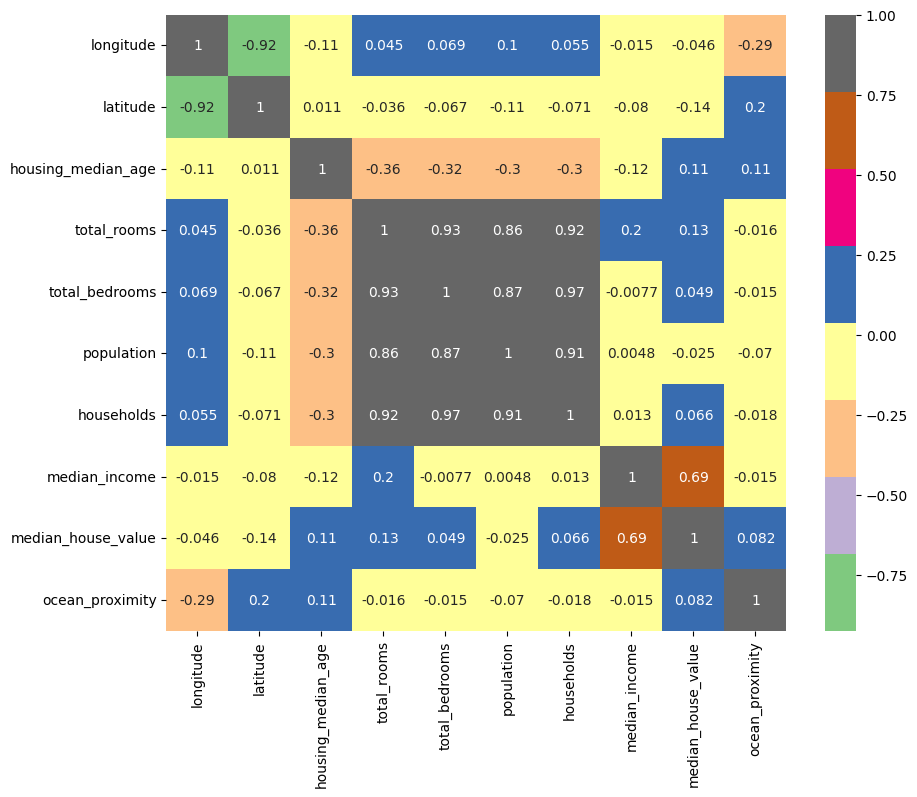

In [100]:
correlation = df_1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="Accent")

---
Menyimpan Data Ke Variabel

In [101]:
df = download_url_path(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


---
Mempreprocessing Data Frame Dengan Metode PipeLine

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pipe = Pipeline([
    ("encoder", OrdinalEncoder()),
    ("imputer", IterativeImputer()),
    ])

data_array = pipe.fit_transform(df)
df_2 = pd.DataFrame(data_array, columns=df.columns, index=df.index)
df_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,170.0,515.0,40.0,733.0,128.0,296.0,125.0,12416.0,3665.0,3.0
1,171.0,513.0,20.0,5255.0,1103.0,2346.0,1129.0,12411.0,3074.0,3.0
2,169.0,512.0,51.0,1316.0,189.0,469.0,176.0,11941.0,3017.0,3.0
3,168.0,512.0,51.0,1123.0,234.0,531.0,218.0,10269.0,2917.0,3.0
4,168.0,512.0,51.0,1476.0,279.0,538.0,258.0,6656.0,2925.0,3.0


---
Menggunakan Function 'checking_all'

In [103]:
checking_all(df_2)


--- Total Duplicated ---

0

--- Total Null ---

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

--- Info Data ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     2064

---
Menampilkan Hubungan Antar Column Dengan Yang Lain

<Axes: >

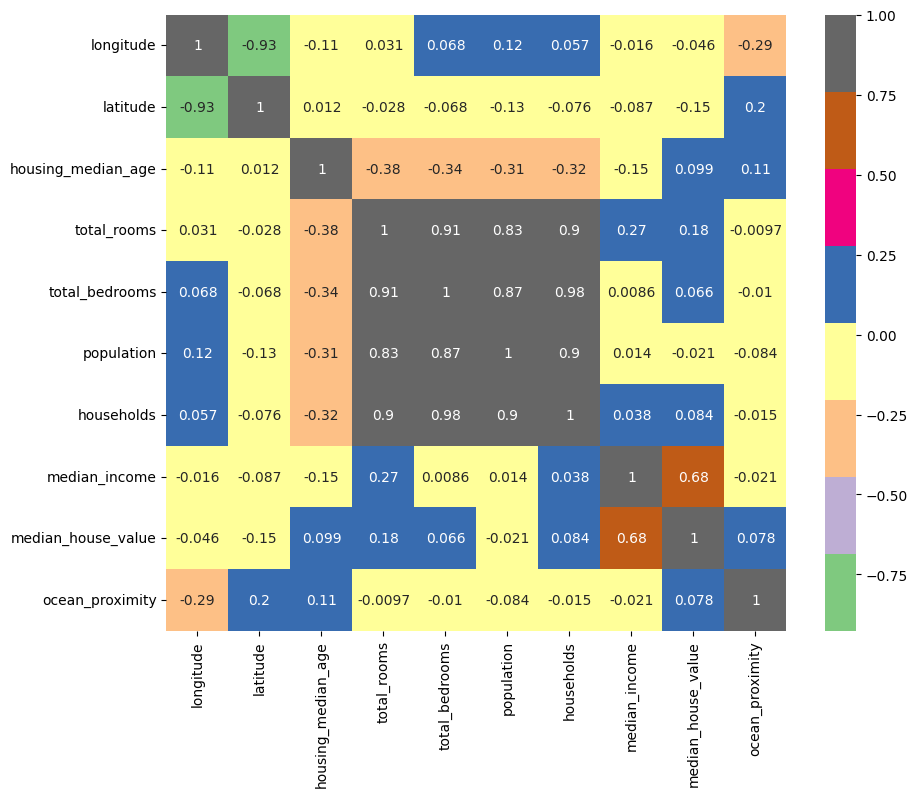

In [104]:
correlation = df_2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="Accent")

---
Menampilkan PipeLine Step Pertama

In [105]:
pipe.steps[0]

('encoder', OrdinalEncoder())

---
Menampilkan PipeLine Step Kedua

In [106]:
pipe.steps[1]

('imputer', IterativeImputer())

---
Preprocessing Dan Memisahkan Data Dengan Metode 'train_test_split'

In [107]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

scaler_model = StandardScaler()

# Feature Engineering
df_1["rooms_per_household"] =  df_1["total_rooms"]/df_1["households"]

df_1["bedrooms_per_room"] = df_1["total_bedrooms"]/df_1["total_rooms"]

df_1["population_per_household"] = df_1["population"]/df_1["households"]

X_scaled = scaler_model.fit_transform(df_1.drop("median_house_value", axis=1)) # harus begini biar engga error
# X = df_1.drop(["median_house_value"], axis=1)
y = df_1["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

---
Mengevaluasi Model Dengan Metode 'MAE', 'MSE', Dan 'RMSE' Score

In [108]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error

def evaluate_model(model, y_test, y_pred) -> None:
    print("\n"+10*"- "+str(model)+" -"*10+"\n")
    print("MAE Score:", mean_absolute_error(y_test, y_pred))
    print("MSE Score:", mean_squared_error(y_test, y_pred))
    print("RMSE Score:", root_mean_squared_error(y_test, y_pred))

---
Menggunakan Model 'Lasso', 'LinearRegression', Dan 'DecisionTreeRegressor'

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


kumpulan_model = [Lasso(), LinearRegression(), DecisionTreeRegressor()]

for model in kumpulan_model:
    model.fit(X_train, y_train)

    evaluate_model(model, y_test, model.predict(X_test))
    print("\nData Train cross validation score:\n", cross_val_score(model, X_train, y_train, cv=5))
    print("\nData Test cross validation score:\n", cross_val_score(model, X_test, y_test, cv=5))


- - - - - - - - - - Lasso() - - - - - - - - - -

MAE Score: 55674.51597844601
MSE Score: 6932939383.818576
RMSE Score: 83264.27435472296

Data Train cross validation score:
 [0.65496911 0.63967111 0.65611552 0.6564203  0.627363  ]

Data Test cross validation score:
 [ 0.0211793   0.63313033 -0.26795403  0.56409215  0.57233026]

- - - - - - - - - - LinearRegression() - - - - - - - - - -

MAE Score: 55675.186796613176
MSE Score: 6933395669.557421
RMSE Score: 83267.0142947219

Data Train cross validation score:
 [0.65496569 0.63967292 0.65611486 0.65642016 0.62735591]

Data Test cross validation score:
 [ 0.02037711  0.63314209 -0.26976028  0.56407897  0.5722865 ]

- - - - - - - - - - DecisionTreeRegressor() - - - - - - - - - -

MAE Score: 45100.28052325582
MSE Score: 5468359357.693314
RMSE Score: 73948.35601751613

Data Train cross validation score:
 [0.62247087 0.61647828 0.62202112 0.62928157 0.62062506]

Data Test cross validation score:
 [0.40663434 0.54745425 0.47318404 0.37422764 

---
Mengecek Deskripsi Column 'Median_house_value' Bagian 'Mean'

In [110]:
df_1.describe().median_house_value["mean"]

np.float64(206855.81690891474)